# MASK RCNN

## Tensorflow version 2 supported

In [2]:
# load all the dependencies
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import argparse

# import the utility functions
from mrcnn.visualize import display_instances
from mrcnn.config import Config
from mrcnn.model import MaskRCNN

In [ ]:
# argument parser
# parser = argparse.ArgumentParser()
# parser.add_argument('-i', '--input', help='path to the input image')
# args = parser.parse_args()

In [3]:
# define 81 classes of coco model trained on
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [4]:
# define the test configuration
class TestConfig(Config):
     NAME = "test"
     GPU_COUNT = 1
     IMAGES_PER_GPU = 1
     NUM_CLASSES = 1 + 80

In [5]:
# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())

# load coco model weights
rcnn.load_weights('mask_rcnn_coco.h5', by_name=True)
print('Weight loaded')

# load image
img = load_img('images/2516944023_d00345997d_z.jpg')
img = img_to_array(img)

# make prediction
results = rcnn.detect([img], verbose=0)

Instructions for updating:
Use fn_output_signature instead
Weight loaded
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


In [6]:
r = results[0]

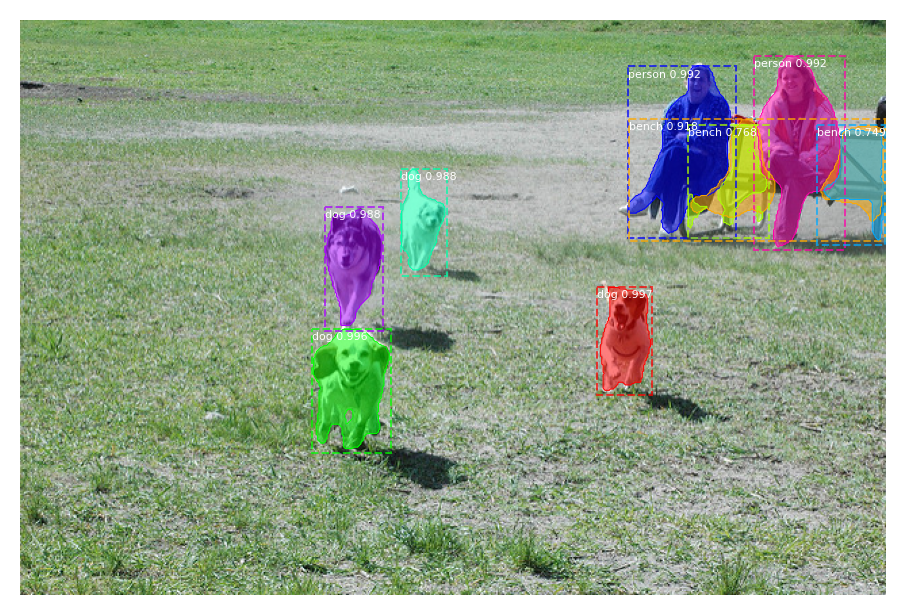

In [7]:
# display the resulting image
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])